# 15.780 Fall 2023
## The Analytics of Operations Management
### Problem Set 1 - Regression & Time Series
#### Due Date:  09/22
---
Name of Student: [Joy Bhattacharya]

MIT ID Number: [922631264]

---

### Instructions:

1) Submit solutions that are your own, in your own words. You are allowed to discuss with other students in general terms, but make sure you are not copying verbatim from another student. Therefore do not read other students' solutions. If you use material from outside this class, reference it in your solution. 

2) Please download the python file attached in the assignment and complete your answers there in the same file. Read the questions carefully, and make sure you answer every part that the question asks.

3) Include relevant code in the PDF submission even if the question doesn't explicitly ask for it. Upload your solutions as a PDF file. Include your name and MIT ID on the first page.

4) To convert to pdf, you can use the "print to pdf" option in jupyter (or equivalent options in other IDE). There are other options to directly download in to pdf format which might include additional installation of packages. 

5) Show your work and explain your conclusions clearly and precisely. Plots should have clear titles and axis labels so that it is clear what your analysis is showing.

--------------------------------------------------------------------------------------------------------------------------------

In [6]:
!pip install pmdarima

DEPRECATION: holopy unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of holopy or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

First, we import the packages we will be using

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd  
import seaborn as sns
from pmdarima import auto_arima
%matplotlib inline

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

The following function can be useful throught the homework.

In [8]:
# Calculate the Mean Absolute Percentage Error (MAPE) for training and testing data
def calculate_mape(y_true, y_pred):
    return (100 * abs((y_true - y_pred) / y_true)).mean()

---
## $\textbf{Problem 1.}$ (Linear Regression) (45 pts)
The dataset $\texttt{hybrid_car.csv}$ contains data on 153 models of hybrid cars released since 1997. The data includes manufacturer's suggested retail price (in 2013 dollars), the model year of the car, the miles per gallon of the car, and the car's acceleration rate (in km/hr/sec). Unclear
why they’d report one variable in imperial units and the other in metric units, but let’s roll with it. Our objective is to understand the extent to which $\texttt{year}$, $\texttt{mpg}$, and $\texttt{accelerate}$ can be used to predict the $\texttt{msrp}$ of the car.

In [9]:
# Assuming 'hybrid_car.csv' is in the same directory as your Python script or Jupyter Notebook
file_path = 'hybrid_car.csv'

# Use the read_csv function to load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

,vehicle,year,msrp,accelerate,mpg
0,Prius (1st Gen),1997,24509.74,7.46,41.26
1,Tino,2000,35354.97,8.20,54.10
2,Prius (2nd Gen),2000,26832.25,7.97,45.23
3,Insight,2000,18936.41,9.52,53.00
4,Civic (1st Gen),2001,25833.38,7.04,47.04


**1**. Let’s begin by splitting our data into a training set and a test set. Create a training set using the $\textbf{first}$ 110 observations, and use the remaining 43 observations to create a test set. Then, run a simple regression with `msrp` as the `y` variable and `mpg` as our predictor using the training set and store it in an object called `lm\_msrp`. Report your model slope estimate, p-value, and in-sample $R^2$. Include all your code (to split data, run a regression, and get the summary of the regression). (10 pts)


In [10]:
# Select the first 110 observations for the training set
train_set = df[0:110]

# Select the remaining 43 observations for the test set
test_set = df[110:]

print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (110, 5)
Test set shape: (43, 5)


We now do a regression on $y = \texttt{msrp}$ with $\texttt{mpg}$ as a predictor.

In [11]:
# Define the dependent variable (y) and predictor variable (X)
y_train = train_set['msrp']
X_train = train_set['mpg']

# Add a constant term to the predictor variable (intercept)
X_train = sm.add_constant(X_train)

# Fit the linear regression model
lm_msrp = sm.OLS(y_train, X_train).fit()

# Get the model summary
summary = lm_msrp.summry()
print(summary)

AttributeError: 'OLSResults' object has no attribute 'summry'

**Comment**: The estimate for the slope is -891.5216 with a p-value of 0.000. The adjusted R^2 is 0.244.

---
**2**. Make a plot of Fitted Values vs. Residuals in your training set and add a horizontal line at residuals = 0. Do you think that a linear model is a good fit to this data? Include the plot and your code in your submission. (10 pts)

- Hint: The command `.fittedvalues` of a linear regression model may be useful.

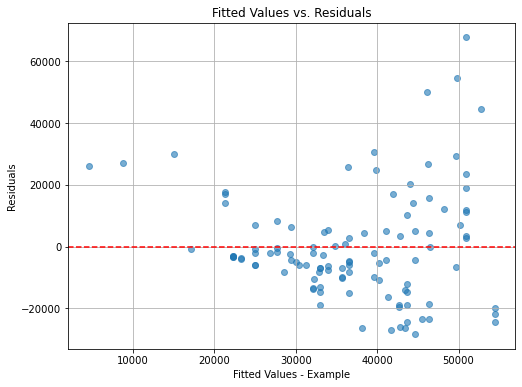

In [9]:
fitted_values = lm_msrp.fittedvalues

# Calculate residuals (actual - predicted)
residuals = lm_msrp.resid

# Create the scatter plot of Fitted Values vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')


# Label the axes and add a title
plt.xlabel('Fitted Values - Example')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

# Show the plot
plt.grid(True)
plt.show()

**Comment**: I don't think the linear model is a good fit for the data because the homoskedasticity condition doesn't seem to be satisfied. The variance of the residuals is not constant across all levels of the x-variable, we have really large positive residuals for x between 0 to 20,000 and from 40,000 upwards. I also don't think that the normality condition is satisfied because the residuals are not normally distributed across the given x-value. Instead, we see extreme residual values far from 0. 

---
**3** Let’s define `lmsrp` as the base-e logarithm of the MSRP. You can add a new column to the data using `df['lmsrp'] = df['msrp'].apply(np.log)`. We’ll proceed with our regression analysis using this transformed variable. 

Run another regression with `lmsrp` as the `y` variable, and `mpg` as the predictor. Make a plot of Fitted Values vs. Residuals and add a horizontal line at residuals = 0. 

Do you think that a linear model is a good fit to this transformed data? Again, include all your code (to transform the `y` values to their log, regression for the log values, to create the new residual plot) (10 pts).

First, apply the the transformation

In [11]:
df['lmsrp'] = df['msrp'].apply(np.log)

0      10.106826
1      10.473194
2      10.197360
3       9.848842
4      10.159423
         ...    
105     9.701597
106    10.393516
107    10.292984
108    10.040565
109    10.453146
Name: lmsrp, Length: 110, dtype: float64

We now do the linear model in the transformed data `lmsrp`.

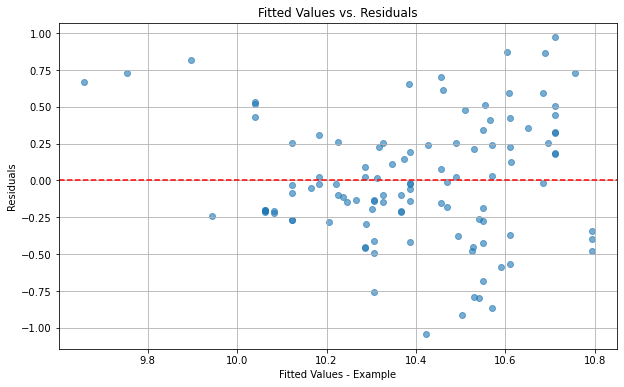

In [13]:
# Define the dependent variable (y)
y_train_log = train_set['lmsrp']

# Fit the linear regression model
lm_lmsrp = sm.OLS(y_train_log, X_train).fit()

# Get the fitted values and residuals
fitted_values = lm_lmsrp.fittedvalues
residuals = lm_lmsrp.resid


# Create the scatter plot of Fitted Values vs. Residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)

# Add a horizontal line at residuals = 0
plt.axhline(0, color='red', linestyle='--')

# Label the axes and add a title
plt.xlabel('Fitted Values - Example')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

# Show the plot
plt.grid(True)
plt.show()

**Comment**:  FIX THIS. I don't think this linear model is a good fit for the data because the homoskedasticity condition doesn't seem to be satisfied. The variance of the residuals is not constant across all levels of the x-variable, we have really large positive residuals for x between 0 to 20,000 and from 40,000 upwards. I also don't think that the normality condition is satisfied because the residuals are not normally distributed across the given x-value. Instead, we see extreme residual values far from 0.

---
**4**. Now, run a multiple regression using `lmsrp` as the `y` variable and `mpg`, `year`, and `accelerate` as the predictors. 

Is there evidence that a model containing `year`, `mpg`, and `accelerate` provides a substantial improvement in predictive performance relative to a model that only includes `mpg`? 

Include all your code.

In [14]:
# Define the dependent variable (y) and predictor variables (X)
y = train_set['lmsrp']
X = train_set[['year', 'mpg', 'accelerate']]

# Add a constant term to the predictor variables (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
lm_msrp_multiple = sm.OLS(y, X).fit()

We now make a comparison of the results. 

In [15]:
# Print the summary of the regression results
print(lm_lmsrp.summary())

                            OLS Regression Results                            
Dep. Variable:                  lmsrp   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           8.99e-08
Time:                        16:41:24   Log-Likelihood:                -60.098
No. Observations:                 110   AIC:                             124.2
Df Residuals:                     108   BIC:                             129.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1383      0.136     82.020      0.0

In [16]:
print(lm_msrp_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                  lmsrp   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     33.49
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           2.63e-15
Time:                        16:41:28   Log-Likelihood:                -38.050
No. Observations:                 110   AIC:                             84.10
Df Residuals:                     106   BIC:                             94.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6758     18.683      0.893      0.3

**Comment**: DO THIS LATER

---
**5**. For the multiple regression model you built in part 4, calculate the MAPE of the model on both the training and testing data.

In [23]:
# Training data predictions
y_train_pred = lm_msrp_multiple.predict(X)  # Predictions for the training data

# Test data and its predictions
X_test = X = test_set[['year', 'mpg', 'accelerate']]
X_test = sm.add_constant(X_test)
y_test_pred = lm_msrp_multiple.predict(X_test)
y_test_log =  test_set['lmsrp']

ValueError: shapes (43,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [19]:
# Calculate MAPE for training data
mean_mape_train = calculate_mape(y, y_train_pred)
mean_mape_train

2.603243630935381

In [20]:
# Calculate MAPE for testing data
mean_mape_test = calculate_mape(y_test_log, y_test_pred)
mean_mape_test

2.378329125635776

**Comment**:

---
---
## $\textbf{Problem 2.}$ (Time Series Modeling) (50 pts)

For this question, we use the skin moisturizer sales data, located in the file `MoisturizerSalesGoogleTrend.csv`. This file has **weekly** sales data for a popular moisturizer (normalized to hide true values), and also the value of Google trends for the keyword “eczema” (also normalized). Google trends provides a measure of the search volume of a given keyword on the Google search engine. Here we think that eczema searches can help us predict sales of moisturizer. We will compare a regression model using the trends data to a time series model with a seasonal component and see which performs best.

Load the data.

In [ ]:
# Use the read_csv function to load the CSV file into a DataFrame
data = pd.read_csv('MoisturizerSalesGoogleTrend.csv')
data.head(10)

---
**1**. Plot the sales data versus time, and the trend data versus time in separate plots. What do you observe
about both plots? Include the plots in your Canvas submission. (10 pts)

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

Create the plots

In [ ]:
# Create two separate plots for sales data and trend data
plt.figure(figsize=(12, 6))

# Sales data scatter plot
# FILL IN

# Adjust layout and display plots
plt.tight_layout()
plt.show()

**Comment**:

---
**2**. Build a linear regression model for moisturizer sales with the Google trends data. Use the data up to and including `2013-12-29` as your training set, with everything following that date as your testing data. This partition should provide you with 177 training data points and 82 testing data points. Your regression equation should be of the form: 

$$y = \text{MoisturizerSales}, X=\text{GoogleTrendVolumeEczema}$$

Report the following:
- Model's slope
- p-value
- MAPE for both the training and testing data.

In [ ]:
# Split the data into training (up to 2013-12-29) and testing (after 2013-12-29) datasets
training_data = data[#FILL IN]
testing_data = data[#FILL IN]

print("Training data points: ", training_data.shape[0])
print("Testing data points: ", testing_data.shape[0])

In [ ]:
# Define the independent variable (Google Trend Volume) and add a constant term for the intercept
X_train = sm.add_constant(training_data['FILL IN'])
X_test = sm.add_constant(testing_data['FILL IN'])

# Define the dependent variable (Moisturizer Sales)
y_train = training_data['FILL IN']
y_test = testing_data['FILL IN']

# Fit the linear regression model using training data
model = # FILL IN

# Get the model summary
model_summary = model.summary()

Now we get the model metrics.

In [ ]:
# Extract the model's slope and p-value
slope = # FILL IN
p_value = # FILL IN

# Predict the values using the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mape_train = calculate_mape(#FILL IN)
mape_test = calculate_mape(#FILL IN)

# Print the results
print("Linear Regression Model Results:")
print(model_summary)
print("\n")
print(f"Slope: {slope:.4f}")
print(f"p-value: {p_value:}")
print(f"MAPE (Training Data): {mape_train:.4f}%")
print(f"MAPE (Testing Data): {mape_test:.4f}%")

---
**3**. Plot your residuals for the above linear regression. Your x-axis should be the time index (or observation
index). Do you observe a pattern? (5 pts)

In [ ]:
# Get the residuals (differences between actual and predicted values) for training data
residuals_train = # FILL IN

# Create a plot of residuals against the observation index (time index) for training data
plt.figure(figsize=(12, 6))
#FILL IN
plt.show()

**Comment**:

Now let’s try to build an ARIMA model. From this point on, use only the training data.

---
**4**. Use the `auto_arima` function from the `pmdarima` package to build a time series model. (10 pts)
- Hint: What frequency should you specify for the seasonal component given that this is weekly data?

In [ ]:
# Convert column to time series (in this case, it's already a series in DataFrame)
sales_series = training_data['MoisturizerSales']

# Fit the auto_arima model
arima_model = #FILL IN

In [ ]:
# Print summary of the model
print(arima_model.summary())

***4. (a)*** What are the parameters $(p, d, q)$ of the fitted ARIMA model? (5pts)

In [ ]:
# Extract the parameters
p, d, q = # FILL IN
P, D, Q, s = # FILL IN

print(f"The ARIMA parameters are p = {p}, d = {d}, q = {q}")
print(f"The seasonal ARIMA parameters are P = {P}, D = {D}, Q = {Q}")

***4. (b)*** Find the training set MAPE of your ARIMA model (5pts)

In [ ]:
predicted_values = # FILL IN
actual_values = # FILL IN
mape_arima = calculate_mape(# FILL IN, FILL IN)

In [ ]:
print("The training set MAPE is" , mape_arima)


As we saw, time series models are not *explanatory*, since they just use previous values of the time series to predict the future (rather than relating them to other variables). Let’s look at a simple way that you might incorporate external data into a time series model. 

---
**5.** Create a new dataframe called `resid` that has the same number of rows as the training set, and contains three columns: `Date` and `GoogleTrendVolumeEczema` (copied directly from the training set) and `Residuals` (the prediction error of each training point from the model you just built). Then build a regression model to predict `Residuals` based on `GoogleTrendVolumeEczema` and print the summary. (10 pts)


In [ ]:
# 1. Get the residuals from the ARIMA model
residuals = # FILL IN

# 2. Create a new dataframe
resid = pd.DataFrame({
    'Date': training_data.index,  
    'GoogleTrendVolumeEczema': # FILL IN,
    'Residuals': residuals
})

# 3. Fit a regression model
X = # FILL IN
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = # FILL IN

model = sm.OLS(y, X).fit()
print(model.summary())

---
**6.** Create a new fitted model for the training points by composing (adding together) the predictions of
the ARIMA model and the linear regression. What is the MAPE of this prediction? (5pts)

In [ ]:
# 1. Get predictions from the ARIMA model for the training set
arima_preds = # FILL IN

# 2. Predict residuals using the regression model
predicted_residuals = # FILL IN

# 3. Combine both predictions
combined_preds = # FILL IN

# 4. Calculate MAPE
mape_combined = calculate_mape(# FILL IN, FILL IN)
print(f"MAPE of the combined prediction: {mape_combined:.2f}%")

**Comment**:

---
*End of Homework 1*